In [1]:
import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os,sys
from tqdm.auto import tqdm
import proplot as plot
import json,pickle
import dask.array as da
import gc
from sklearn.decomposition import PCA
sys.path.insert(1, '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/')
from tools import derive_var,read_and_proc,preproc_noensemble
from tools.mlr import mlr
from tools.preprocess import do_eof,preproc_maria,preproc_haiyan
%matplotlib inline
plot.rc.update({'figure.facecolor':'w','axes.labelweight':'ultralight',
                'tick.labelweight':'ultralight','gridminor.linestyle':'--','title.weight':'normal','linewidth':0.5})

/tmp/ipykernel_3006465/1321067960.py:20: ProplotWarning: rc setting 'linewidth' was renamed to 'meta.width' in version 0.8.
  plot.rc.update({'figure.facecolor':'w','axes.labelweight':'ultralight',


In [2]:
path = '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/'
suffix = '_smooth_preproc_dict1b_g'
a = [read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['u'].shape for lime in tqdm(range(1,21))]
# divide experiments reference
divider = np.asarray([aobj[0] for aobj in a]).cumsum()

  0%|          | 0/20 [00:00<?, ?it/s]

#### Read

In [3]:
path = '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/'
suffix = '_smooth_preproc_dict1b_g'

haiyan_u = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['u'] for lime in tqdm(range(1,21))],axis=0)
haiyan_v = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['v'] for lime in tqdm(range(1,21))],axis=0)
haiyan_w = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['w'] for lime in tqdm(range(1,21))],axis=0)
haiyan_qv = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['qv'] for lime in tqdm(range(1,21))],axis=0)
haiyan_theta = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['theta'] for lime in tqdm(range(1,21))],axis=0)
haiyan_heatsum = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['heatsum'] for lime in tqdm(range(1,21))],axis=0)
haiyan_hdia = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['hdia'] for lime in tqdm(range(1,21))],axis=0)
haiyan_rad = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['rad'] for lime in tqdm(range(1,21))],axis=0)
haiyan_ir = np.concatenate([read_and_proc.depickle(path+'TCGphy/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['ir'] for lime in tqdm(range(1,21))],axis=0)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [4]:
dims = ['sample','flatarray']
coords = dict(sample=np.linspace(0,haiyan_u.shape[0]-1,haiyan_u.shape[0]),flatarray=np.linspace(0,haiyan_u.shape[1]-1,haiyan_u.shape[1]))

ds = xr.Dataset(coords=coords)
haiyan_data=preproc_haiyan.build_a_xarray_dataset(ds=ds,varname=['u','v','w','theta','heatsum','hdia','rad','qv','ir'],\
                                   varfile=[haiyan_u,haiyan_v,haiyan_w,haiyan_theta,haiyan_heatsum,haiyan_hdia,haiyan_rad,haiyan_qv,haiyan_ir],dims=dims,coords=coords)
del haiyan_u,haiyan_v,haiyan_w,haiyan_theta,haiyan_heatsum,haiyan_hdia,haiyan_rad
gc.collect()

118

In [5]:
folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/testML/output/haiyan/processed/'
dict1,dict2 = read_and_proc.depickle(folderpath+'pca/PCA'+'_'+'dict1_g'),read_and_proc.depickle(folderpath+'pca/PCA'+'_'+'dict2_g')
dict1['qv'] = (dict2['qv'])
dict1['ir'] = (dict2['ir'])

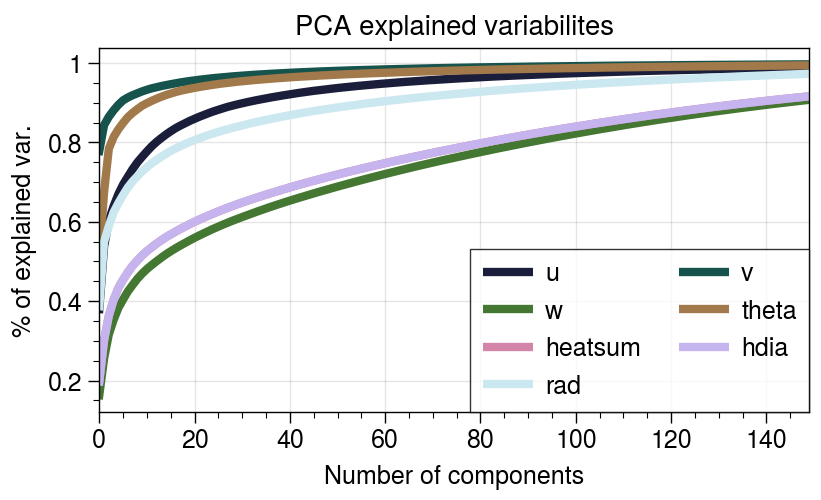

In [37]:
with sns.color_palette("cubehelix", n_colors=7):
    fig,ax = plot.subplots(ncols=1,nrows=1,axwidth=3.55,refaspect=1.951,sharey=3,sharex=0) 
    for inx,i in enumerate(['u', 'v', 'w', 'theta', 'heatsum', 'hdia', 'rad']):
        ax.plot(dict1[i].explained_variance_ratio_.cumsum(),lw=3,label=i)
    ax.format(title='PCA explained variabilites',xlabel='Number of components',ylabel='% of explained var.')
    ax.legend(loc=4,ncol=2)
    plt.savefig('../../figures/0406/pca_fig.png',dpi=300)
    plt.show()

#### Produce Input Dataset

In [53]:
def forward_diff(arrayin=None,delta=None,axis=None,LT=1):
    result = []
    if axis==0:
        for i in range(0,arrayin.shape[axis]-LT):
            temp = (arrayin[i+LT,:]-arrayin[i,:])/(LT*delta)
            result.append(temp)
        return np.asarray(result)
    
class input_output:
    def __init__(self,PCAdict=None,folderpath=None,ts_varname=None,nummem=None):
        self.PCAdict = PCAdict
        self.varname=ts_varname
        self.nummem = nummem # u: 36 (40% variability in du), v:16/32 (40% dv var;50%), w:44 (40% dw var)
    
    ###################################################################################################################################################
    # Produce time series
    ###################################################################################################################################################    
    def produce_timeseries(self,flatvar=None):
        ts_dict = {}
        for indx,obj in tqdm(enumerate(self.varname)):
            ts_dict[obj] = self.PCAdict[obj].transform(flatvar[obj].data)[:,0:]
        return ts_dict
    
    def normalize_timeseries(self,timeseries=None):
        assert timeseries['u'].shape[-1]==150,"var shape error"
        ts_dict = {}
        for indx,obj in tqdm(enumerate(self.varname)):
            ts_dict[obj] = (timeseries[obj]-np.nanmean(timeseries[obj],axis=0))/np.nanstd(timeseries[obj],axis=0)
        return ts_dict
    
    ###################################################################################################################################################
    # Produce Input Dataset
    ###################################################################################################################################################      
    def _back_to_exp(self,timeseries=None,divider=None):
        printout = [timeseries[0:divider[0],:]]
        for i in range(1,19):
            printout.append(timeseries[divider[i-1]:divider[i],:])
        printout.append(timeseries[divider[-2]:,:])
        return printout
    
    def back_to_exp(self,inputlong=None,divider=None):
        ts_dict = {}
        for indx,obj in tqdm(enumerate(self.varname)):
            ts_dict[obj] = self._back_to_exp(inputlong[obj],divider)
        return ts_dict
    
    def train_valid_test(self,expvarlist=None,validindex=None,testindex=None,concat='Yes'):
        X_valid, X_test = [expvarlist[i] for i in validindex], [expvarlist[i] for i in testindex]
        X_train = expvarlist.copy()
        [X_train.pop(i) for i in validindex]
        [X_train.pop(i) for i in testindex]
        assert len(X_train)==16, 'wrong train-valid-test separation!'
        if concat=='Yes':
            return np.concatenate([X_train[i] for i in range(len(X_train))],axis=0), np.concatenate([X_valid[i] for i in range(len(X_valid))],axis=0), np.concatenate([X_test[i] for i in range(len(X_test))],axis=0)
        else:
            return X_train, X_valid, X_test
    
    def make_X(self,expvarlist=None,varwant=None,validindex=None,testindex=None,concat='Yes'):
        trainlist,validlist,testlist = [],[],[]
        for obj in varwant:
            test1,test2,test3 = self.train_valid_test(exp_pca_norml[obj],validindex,testindex,'Yes')
            trainlist.append(test1)
            validlist.append(test2)
            testlist.append(test3)
        return np.concatenate([trainlist[i] for i in range(len(trainlist))],axis=1), np.concatenate([validlist[i] for i in range(len(validlist))],axis=1), np.concatenate([testlist[i] for i in range(len(testlist))],axis=1)
    
    ###################################################################################################################################################
    # Produce Output Dataset
    ###################################################################################################################################################
    def get_time_diff_terms(self,inputvar=None,LT=None):
        def _get_time_diff(array=None,timedelta=60*60,LT=None):
            store = []
            for exp in array:
                a = forward_diff(exp,timedelta,0,LT)
                if a.shape[0]>0:
                    azero = np.zeros((LT,exp.shape[-1]))
                    store.append(np.concatenate((a,azero),axis=0))
                else:
                    store.append(np.zeros((exp.shape[0],exp.shape[-1])))
            return store
        
        storedict = {}
        for wantvar in ['u','v','w','theta']:
            storedict[wantvar] = _get_time_diff(array=inputvar[wantvar],LT=LT)
        return storedict
    
    def make_Y(self,inputdict=None,LDT=None,validindex=[1,6],testindex=[2,12]):
        def _make_Y(inputt=None):
            varTRAIN,varVALID,varTEST = [],[],[]
            for varobj in ['u','v','w','theta']:
                test1,test2,test3 = self.train_valid_test(expvarlist=test[0][varobj],validindex=validindex,testindex=testindex,concat='Yes')
                varTRAIN.append(test1)
                varVALID.append(test2)
                varTEST.append(test3)
            return np.concatenate([varTRAIN[i] for i in range(len(varTRAIN))],axis=1), np.concatenate([varVALID[i] for i in range(len(varVALID))],axis=1), np.concatenate([varTEST[i] for i in range(len(varTEST))],axis=1)
        
        test = [self.get_time_diff_terms(exp_pca_nonorml,int(LDTobj)) for LDTobj in LDT]
        return [_make_Y(timediffobj) for timediffobj in test]

In [9]:
haiyan_pca_nonorml = input_output( dict1, None, ['u', 'v', 'w', 'qv','theta', 'heatsum', 'hdia', 'rad', 'ir'], None ).produce_timeseries( haiyan_data )
haiyan_pca_norml = input_output( dict1, None, ['u', 'v', 'w', 'qv','theta', 'heatsum', 'hdia', 'rad', 'ir'], None ).normalize_timeseries( haiyan_pca_nonorml )

exp_pca_norml = input_output( dict1, None, ['u', 'v', 'w', 'qv','theta', 'heatsum', 'hdia', 'rad', 'ir'], None ).back_to_exp( haiyan_pca_norml, divider ) 
exp_pca_nonorml = input_output( dict1, None, ['u', 'v', 'w', 'qv','theta', 'heatsum', 'hdia', 'rad', 'ir'], None ).back_to_exp( haiyan_pca_nonorml, divider ) 

X_train, X_valid, X_test = (input_output(dict1,None,['u','v','w','qv','theta','heatsum','hdia','rad','ir'],None).make_X( exp_pca_norml,['u','v','w','theta','hdia','rad'],[1,6], [2,12], 'Yes'))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [11]:
EXP = [['hdia','rad'],['theta','hdia','rad'],['u','v','w','theta','hdia','rad'],['u','v','theta','hdia','rad'],['u','v'],['u','v','w'],['u','v','hdia','rad'],['u','v','w','hdia','rad'],['u','v','w','theta','qv','hdia','rad']]
storename = ['dt','dtth','dtthuvw','dtthuv','uv','uvw','dtuv','dtuvw','dtthuvwqv']

X_traindict,X_validdict,X_testdict = {},{},{}
for ind,obj in enumerate(storename):
    test1,test2,test3 = (input_output(dict1,None,['u','v','w','qv','theta','heatsum','hdia','rad','ir'],None).make_X(exp_pca_norml,EXP[ind],[1,6],[2,12],'Yes'))
    X_traindict[obj] = test1
    X_validdict[obj] = test2
    X_testdict[obj] = test3

In [13]:
print(f"Test set, percentage of samples:       {(np.sum([np.asarray([aobj[0] for aobj in a])[indx] for indx in [2,12]])/1565):.3f} \n"+
      f"Validation set, percentage of samples: {(np.sum([np.asarray([aobj[0] for aobj in a])[indx] for indx in [1,6]])/1565):.3f}")
print(f"\nSample/member: {np.asarray([aobj[0] for aobj in a])}",)

Test set, percentage of samples:       0.102 
Validation set, percentage of samples: 0.118

Sample/member: [103  77  87 111  95  84 107  87  35  32 106  67  72  87 100  37  84  88
  80  26]


In [15]:
folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/testML/output/haiyan/processed/'
read_and_proc.save_to_pickle(folderpath+'pca/Xtrain'+'_'+'dict_g',X_traindict,'PICKLE')
read_and_proc.save_to_pickle(folderpath+'pca/Xvalid'+'_'+'dict_g',X_validdict,'PICKLE')
read_and_proc.save_to_pickle(folderpath+'pca/Xtest'+'_'+'dict_g',X_testdict,'PICKLE')

#### Produce Output Dataset

In [54]:
y_all = (input_output(dict1,None,['u','v','w','qv','theta','heatsum','hdia','rad','ir'],None).make_Y(exp_pca_nonorml,np.linspace(0,35,36)+1,[1,6],[2,12]))

In [59]:
folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/testML/output/haiyan/processed/'
read_and_proc.save_to_pickle(folderpath+'pca/allY'+'_'+'dict_g',y_all,'PICKLE')